# Get the Data From Kaggle

In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedabady01","key":"38d786c30cd777a58f42c83ecedef5b1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces

100% 694M/696M [00:30<00:00, 24.6MB/s]
100% 696M/696M [00:30<00:00, 23.9MB/s]


In [ ]:
! unzip /content/animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint



In [ ]:
train_path='/content/data/train/'
test_path='/content/data/val/'

# Get Paths 

In [ ]:

train_dir = os.path.join( train_path)
validation_dir = os.path.join(test_path)

# Directory with our training cat pictures
train_cat_dir = os.path.join(train_dir, 'cat')


# Directory with our training dog pictures
train_wild_dir = os.path.join(train_dir, 'wild')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')

# Directory with our validation wild pictures
validation_wild_dir = os.path.join(validation_dir, 'wild')

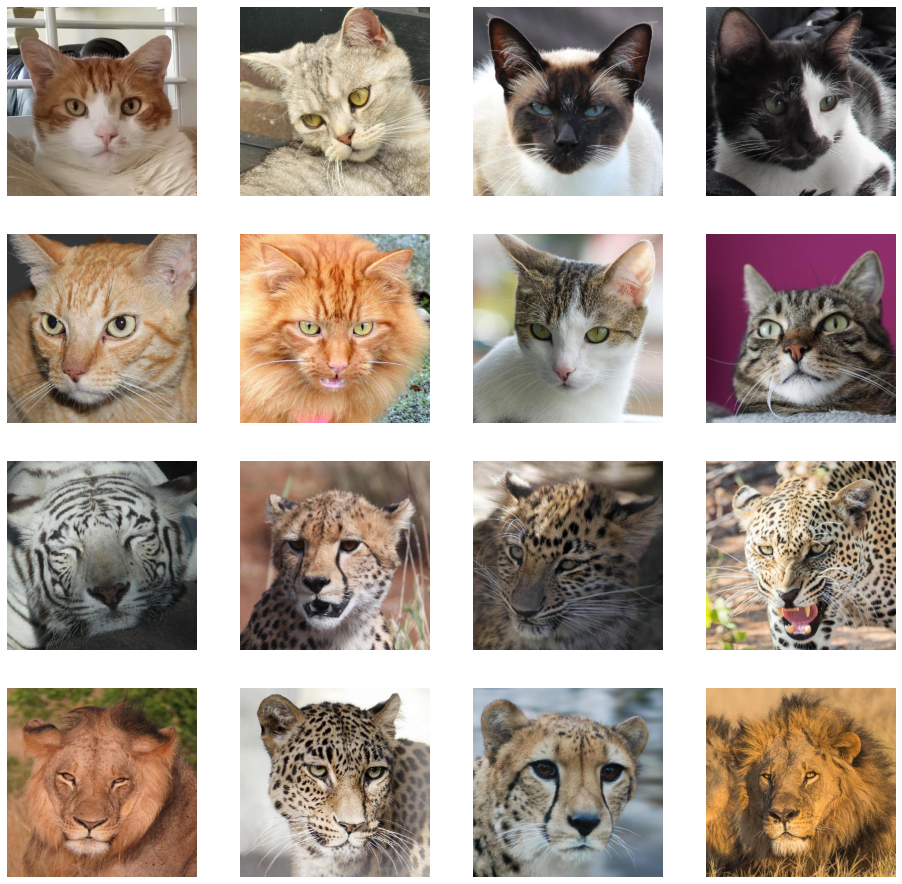

In [ ]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cat_dir )

train_wild_fnames = os.listdir( train_wild_dir )


next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]


next_wild_pix = [os.path.join(train_wild_dir, fname) 
                for fname in train_wild_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_wild_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# VGG16

In [ ]:
train_datagen  = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


In [ ]:
train_generator = train_datagen .flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen .flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 9891 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator,validation_data = validation_generator , epochs = 5)

Epoch 1/5
495/495 [==============================] - 165s 314ms/step - loss: 0.1638 - acc: 0.9388 - val_loss: 0.0435 - val_acc: 0.9920
Epoch 2/5
495/495 [==============================] - 154s 312ms/step - loss: 0.0802 - acc: 0.9712 - val_loss: 0.0552 - val_acc: 0.9890
Epoch 3/5
495/495 [==============================] - 153s 309ms/step - loss: 0.0734 - acc: 0.9754 - val_loss: 0.0646 - val_acc: 0.9900
Epoch 4/5
495/495 [==============================] - 154s 311ms/step - loss: 0.0737 - acc: 0.9785 - val_loss: 0.0698 - val_acc: 0.9880
Epoch 5/5
495/495 [==============================] - 154s 310ms/step - loss: 0.0660 - acc: 0.9813 - val_loss: 0.0450 - val_acc: 0.9950


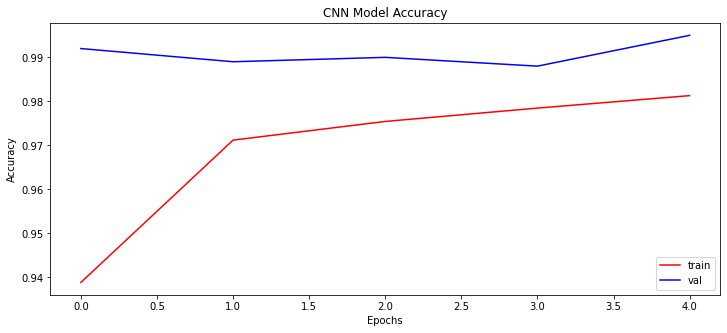

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

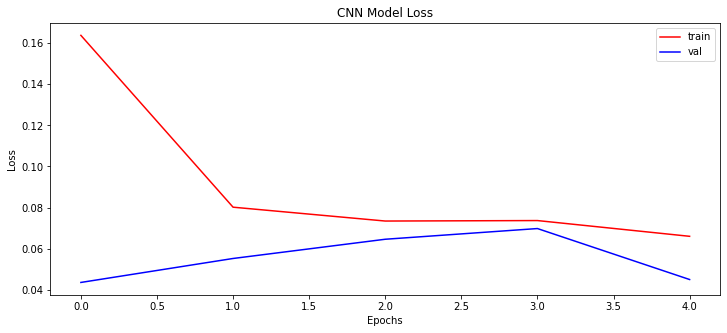

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title(' Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
sds

# mobilenet_v2

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [ ]:

num_of_classes= 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history =model.fit(train_generator,validation_data = validation_generator , epochs = 5)

Epoch 1/5
495/495 [==============================] - 141s 279ms/step - loss: 0.0271 - acc: 0.9904 - val_loss: 0.0099 - val_acc: 0.9990
Epoch 2/5
495/495 [==============================] - 138s 279ms/step - loss: 0.0058 - acc: 0.9986 - val_loss: 0.0085 - val_acc: 0.9990
Epoch 3/5
495/495 [==============================] - 137s 276ms/step - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0084 - val_acc: 0.9990
Epoch 4/5
495/495 [==============================] - 137s 276ms/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0093 - val_acc: 0.9990
Epoch 5/5
495/495 [==============================] - 136s 275ms/step - loss: 0.0033 - acc: 0.9992 - val_loss: 0.0083 - val_acc: 0.9990


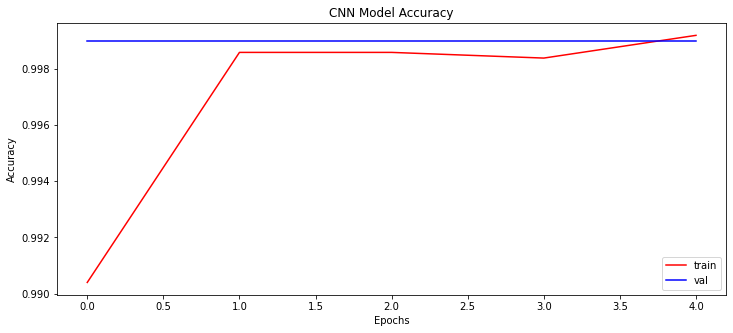

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

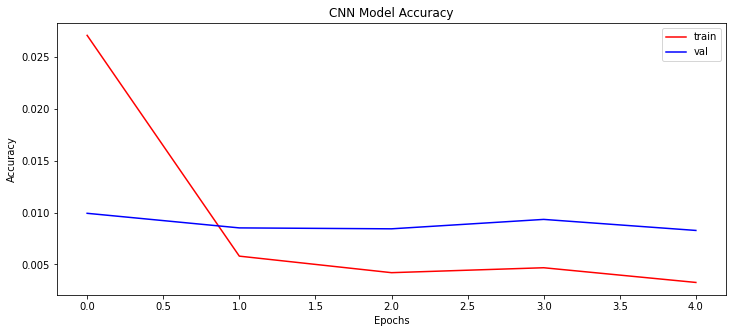

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title(' Model lose')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

# ResNet50 model

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input , decode_predictions 
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
from keras.preprocessing import image

In [ ]:

model  = ResNet50(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history = model.fit(train_generator,validation_data = validation_generator , epochs = 5)

Epoch 1/5
495/495 [==============================] - 156s 313ms/step - loss: 0.5743 - acc: 0.7708 - val_loss: 0.4760 - val_acc: 0.9750
Epoch 2/5
495/495 [==============================] - 154s 310ms/step - loss: 0.4274 - acc: 0.9631 - val_loss: 0.3770 - val_acc: 0.9880
Epoch 3/5
495/495 [==============================] - 154s 310ms/step - loss: 0.3680 - acc: 0.9701 - val_loss: 0.3465 - val_acc: 0.9890
Epoch 4/5
495/495 [==============================] - 153s 309ms/step - loss: 0.3466 - acc: 0.9707 - val_loss: 0.3242 - val_acc: 0.9920
Epoch 5/5
495/495 [==============================] - 152s 308ms/step - loss: 0.3323 - acc: 0.9706 - val_loss: 0.3228 - val_acc: 0.9890


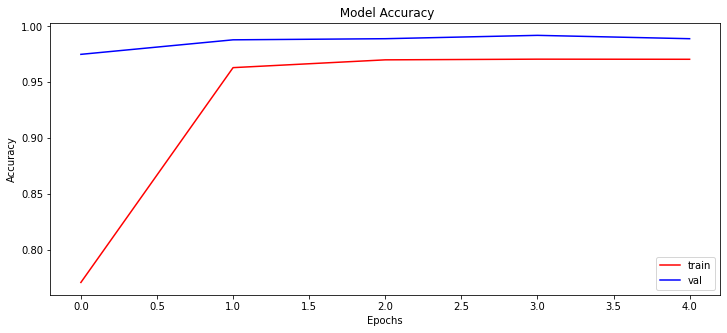

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

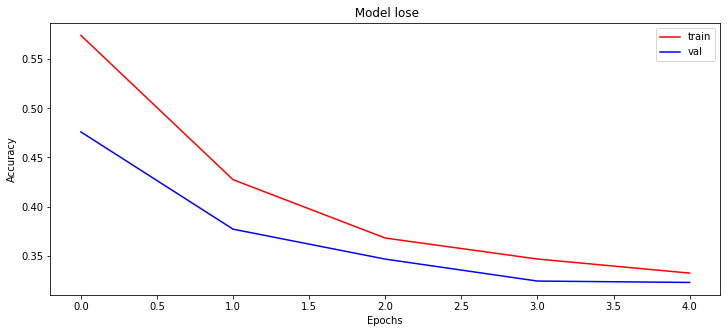

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title(' Model lose')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()